In [32]:
import pandas as pd

In [33]:
models = ['bert-base-uncased', 'distilbert-base-uncased', 'roberta-base']

In [34]:
models = list(map(lambda x:x.split("-")[0]+"_prob", models))

In [35]:
models

['bert_prob', 'distilbert_prob', 'roberta_prob']

In [37]:
df = pd.read_csv("/home/macab/research/robust-representation-learning/concept-explanation/outputs/imdb_sst2_sa/sst2.csv")

In [38]:
df.head()

,text,ground_truth,distilbert_pred,distilbert_prob,roberta_pred,roberta_prob,bert_pred,bert_prob
0,it's a charming and often affecting journey.,1,1,0.998421,1,0.998655,1,0.997684
1,unflinchingly bleak and desperate,0,0,0.935675,0,0.987056,0,0.684826
2,allows us to hope that nolan is poised to emba...,1,1,0.995805,1,0.975733,1,0.995648
3,"the acting, costumes, music, cinematography an...",1,1,0.960720,1,0.988386,0,0.181109
4,"it's slow - - very, very slow.",0,0,0.947970,0,0.993910,0,0.970273


In [39]:
df['mean_prob'] = df[models].mean(axis=1)

In [40]:
df.head()

,text,ground_truth,distilbert_pred,distilbert_prob,roberta_pred,roberta_prob,bert_pred,bert_prob,mean_prob
0,it's a charming and often affecting journey.,1,1,0.998421,1,0.998655,1,0.997684,0.998253
1,unflinchingly bleak and desperate,0,0,0.935675,0,0.987056,0,0.684826,0.869185
2,allows us to hope that nolan is poised to emba...,1,1,0.995805,1,0.975733,1,0.995648,0.989062
3,"the acting, costumes, music, cinematography an...",1,1,0.960720,1,0.988386,0,0.181109,0.710072
4,"it's slow - - very, very slow.",0,0,0.947970,0,0.993910,0,0.970273,0.970718


In [9]:
df = df.sample(frac=1.0)

In [10]:
df.head()

,text,ground_truth,distilbert_pred,distilbert_prob,roberta_pred,roberta_prob,bert_pred,bert_prob,mean_prob
7031,"in this respect, bringing steve jobs back to s...",0,0,0.616070,0,0.960283,0,0.817080,0.797811
2672,jon's defense began to weaken and slow. jon fe...,2,2,0.769695,2,0.973326,2,0.858740,0.867254
1846,a little past the small theater built for loca...,2,2,0.979074,2,0.987399,2,0.979261,0.981911
8818,it is at the moment of maximum audience suscep...,0,0,0.607033,2,0.233893,2,0.353130,0.398019
6147,"south carolina has no referendum right, so the...",2,1,0.240270,2,0.823089,0,0.158566,0.407308


In [14]:
top_5 = df['mean_prob'].quantile(q=0.90)
bottom_5 = df['mean_prob'].quantile(q=0.10)

In [15]:
df_top_5 = df[df['mean_prob'] >= top_5]
df_bottom_5 = df[df['mean_prob'] <= bottom_5]

In [16]:
print(df_top_5.shape, df_bottom_5.shape)

(982, 9) (982, 9)


In [17]:
df_top_5[['text', 'ground_truth', 'mean_prob']].head(10)

,text,ground_truth,mean_prob
1846,a little past the small theater built for loca...,2,0.981911
1220,agency officials stated that copies of both th...,2,0.958203
9545,there were beads of perspiration on his brow. ...,2,0.978763
9118,all these sites will automatically lead into g...,2,0.975238
3036,they post loads of newspaper articles - - yaho...,2,0.990727
3791,i have kept you and clothed you and fed you! i...,2,0.990570
7040,madrid is the perfect base for explorations in...,2,0.983962
1133,"she graduated in 1995 owing $ 58, 000 in loans...",2,0.985352
4743,the road along the coastline to the south trav...,2,0.984317
8803,there are also ferries to discovery bay. there...,2,0.990402


In [18]:
df_bottom_5[['text', 'ground_truth', 'mean_prob']].head(10)

,text,ground_truth,mean_prob
160,"for big raj - buffs, the supreme example of in...",2,0.168860
8314,"in the 19th century, when kashmir was the most...",2,0.186806
6956,anwar el - sadat succeeded nasser in 1970. nas...,2,0.117802
2844,"do you trust me, uncle? gauve hesitated. gauve...",1,0.212983
3259,"and it needs work too, you know, in case i hav...",2,0.213960
9062,"sun ra's spaceships did not come, as it were, ...",2,0.189352
2338,the ams system also allows users to search the...,2,0.081396
5987,this formal review process guarantees represen...,2,0.211944
3550,"he jumped up, planting one hand on the chargin...",2,0.148834
6429,the spear missed vrenna by only a hand - span....,2,0.141670


In [19]:
df_top_5[['text', 'ground_truth', 'mean_prob']].to_csv("top_5_sst2.csv", index=False)
df_bottom_5[['text', 'ground_truth', 'mean_prob']].to_csv("bottom_5_sst2.csv", index=False)

In [51]:
df_top_5[['text', 'mean_prob']].head(10)

,text,mean_prob
793,"a poignant, artfully crafted meditation on mor...",0.999529
837,"just as moving, uplifting and funny as ever.",0.999555
442,"a gorgeous, witty, seductive movie.",0.999628
597,a deep and meaningful film.,0.999635
811,"... a fun little timewaster, helped especially...",0.999458
840,"this is a good script, good dialogue, funny ev...",0.999479
456,this is a story of two misfits who don't stand...,0.999492
658,yakusho and shimizu... create engaging charact...,0.999635
428,it's a charming and often affecting journey.,0.999638
842,a delightful coming-of-age story.,0.999649


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_true=df['ground_truth'], y_pred=df['roberta_pred'], digits=4))

              precision    recall  f1-score   support

           0     0.9340    0.9252    0.9296       428
           1     0.9259    0.9346    0.9302       428

    accuracy                         0.9299       856
   macro avg     0.9299    0.9299    0.9299       856
weighted avg     0.9299    0.9299    0.9299       856



### Analyzing Pretrained Representations 

In [1]:
import os
import gc
import json
import torch
import numpy as np
import pandas as pd
import random
import argparse
from tqdm import tqdm
import pandas as pd
from config import config
from utils import seed, create_trainer, update_results
import pytorch_lightning as pl
from evaluation import evaluate
from dataset.loader import create_loaders
from dataset.dataset import create_datasets
from transformers import AutoTokenizer
from Trainer import LightningModel
from models.model import Model
from datasets import load_dataset

In [2]:
datasets = create_datasets(task='imdb_sst2_sa')

Reusing dataset glue (/home/macab/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


In [3]:
models = config['models']

In [4]:
model_name = models[0]

In [6]:
tokenizer = AutoTokenizer.from_pretrained(model_name, usefast=True, use_lower_case=True)

In [7]:
loaders = create_loaders(
        dataset=datasets,
        task='imdb_sst2_sa',
        tokenizer=tokenizer
    )

100%|██████████| 1/1 [00:00<00:00,  2.83ba/s]


In [8]:
lm = LightningModel(
    model_name=model_name,
    task="imdb_sst2_sa",
    config=config
)

In [9]:
lm.load_state_dict(
    torch.load("./outputs/imdb_sst2_sa/distilbert-base-uncased/epoch=2.ckpt", map_location=torch.device('cpu'))['state_dict']
)

<All keys matched successfully>

In [10]:
trainer = pl.Trainer()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [11]:
trainer.test(
    model=lm,
    test_dataloaders=loaders['sst2']['test']
)

Testing: 100%|██████████| 55/55 [02:12<00:00,  2.07s/it]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.8886, dtype=torch.float64),
 'test_f1': tensor(0.8799, dtype=torch.float64),
 'test_loss': tensor(0.2832),
 'test_precision': tensor(0.8859, dtype=torch.float64),
 'test_recall': tensor(0.8863, dtype=torch.float64)}
--------------------------------------------------------------------------------
Testing: 100%|██████████| 55/55 [02:12<00:00,  2.41s/it]
/home/macab/miniconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The testing_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


[{'test_loss': 0.283192902803421,
  'test_precision': 0.8859083593174502,
  'test_recall': 0.8863001392546848,
  'test_acc': 0.8886363636363637,
  'test_f1': 0.879886611908088}]

In [12]:
df = pd.read_csv("./outputs/imdb_sst2_sa/sst2.csv")
m = list(map(lambda x:x.split("-")[0]+"_prob", models))
df['mean_prob'] = df[m].mean(axis=1)
df.to_csv("./outputs/imdb_sst2_sa/sst2_mean.csv", index=False)

In [13]:
df.head()

,text,ground_truth,distilbert_pred,distilbert_prob,roberta_pred,roberta_prob,bert_pred,bert_prob,mean_prob
0,it's a charming and often affecting journey.,1,1,0.998421,1,0.998655,1,0.997684,0.998253
1,unflinchingly bleak and desperate,0,0,0.935675,0,0.987056,0,0.684826,0.869185
2,allows us to hope that nolan is poised to emba...,1,1,0.995805,1,0.975733,1,0.995648,0.989062
3,"the acting, costumes, music, cinematography an...",1,1,0.960720,1,0.988386,0,0.181109,0.710072
4,"it's slow - - very, very slow.",0,0,0.947970,0,0.993910,0,0.970273,0.970718


In [14]:
predictions =  load_dataset('csv', data_files='./outputs/imdb_sst2_sa/sst2_mean.csv')['train']

Using custom data configuration default-52f62406fba5688e
Dataset csv downloaded and prepared to /home/macab/.cache/huggingface/datasets/csv/default-52f62406fba5688e/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0. Subsequent calls will reuse this data.


In [15]:
predictions

Dataset({
    features: ['text', 'ground_truth', 'distilbert_pred', 'distilbert_prob', 'roberta_pred', 'roberta_prob', 'bert_pred', 'bert_prob', 'mean_prob'],
    num_rows: 872
})

In [16]:
predictions = predictions.filter(lambda example : example['mean_prob'] < 0.8)

100%|██████████| 1/1 [00:00<00:00, 38.08ba/s]


In [17]:
predictions

Dataset({
    features: ['text', 'ground_truth', 'distilbert_pred', 'distilbert_prob', 'roberta_pred', 'roberta_prob', 'bert_pred', 'bert_prob', 'mean_prob'],
    num_rows: 171
})

In [18]:
tokenized = predictions.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True, max_length=config['tasks']['mnli']['max_seq_length']), batched=True)

tokenized.set_format(type='torch', columns=['input_ids', 'attention_mask'])

100%|██████████| 1/1 [00:00<00:00, 15.71ba/s]


In [19]:
# lm.eval()

In [20]:
for param in lm.model.parameters():
    param.requires_grad = False

In [21]:
outputs = torch.empty((0, 768))
for each in tqdm(tokenized):

    _, out = lm(
        input_ids=each['input_ids'].unsqueeze(0), 
        attention_mask=each['attention_mask'].unsqueeze(0),
    )

    outputs = torch.vstack((outputs, out))


    # print(each['input_ids'].shape, each['attention_mask'].shape)

    # print(outputs.shape)
    # break

100%|██████████| 171/171 [00:10<00:00, 16.43it/s]


In [22]:
print(outputs.shape)

torch.Size([171, 768])


In [23]:
torch.save(outputs, "./outputs/imdb_sst2_sa/sst2_finetuned.pt")

In [100]:
# torch.hstack?

#### HANS Dataset

In [24]:
hans = load_dataset("hans")

Reusing dataset hans (/home/macab/.cache/huggingface/datasets/hans/plain_text/1.0.0/1bbcb735c482acd54f2e118074b59cfd2bf5f7a5a285d4d540d1e632216672ac)


In [25]:
hans

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'parse_premise', 'parse_hypothesis', 'binary_parse_premise', 'binary_parse_hypothesis', 'heuristic', 'subcase', 'template'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label', 'parse_premise', 'parse_hypothesis', 'binary_parse_premise', 'binary_parse_hypothesis', 'heuristic', 'subcase', 'template'],
        num_rows: 30000
    })
})

In [28]:
set(hans['train']['heuristic'])

{'constituent', 'lexical_overlap', 'subsequence'}

In [31]:
len(set(hans['train']['template']))

60

In [34]:
hans['train']['template'][:10]

['temp1',
 'temp1',
 'temp1',
 'temp1',
 'temp1',
 'temp1',
 'temp1',
 'temp1',
 'temp1',
 'temp1']

In [37]:
print(hans['train']['premise'][0], hans['train']['hypothesis'][0])

The doctors supported the scientist . The scientist supported the doctors .


In [39]:
print(hans['train']['premise'][2], hans['train']['hypothesis'][2])

The secretaries introduced the judges . The judges introduced the secretaries .


In [41]:
hans['train']['template'][-10:]

['temp68',
 'temp68',
 'temp68',
 'temp68',
 'temp68',
 'temp68',
 'temp68',
 'temp68',
 'temp68',
 'temp68']

In [49]:
hans['train'][0]

{'binary_parse_hypothesis': '( ( The scientist ) ( ( supported ( the doctors ) ) . ) )',
 'binary_parse_premise': '( ( The doctors ) ( ( supported ( the scientist ) ) . ) )',
 'heuristic': 'lexical_overlap',
 'hypothesis': 'The scientist supported the doctors .',
 'label': 1,
 'parse_hypothesis': '(ROOT (S (NP (DT The) (NN scientist)) (VP (VBD supported) (NP (DT the) (NNS doctors))) (. .)))',
 'parse_premise': '(ROOT (S (NP (DT The) (NNS doctors)) (VP (VBD supported) (NP (DT the) (NN scientist))) (. .)))',
 'premise': 'The doctors supported the scientist .',
 'subcase': 'ln_subject/object_swap',
 'template': 'temp1'}

In [50]:
hans['train'][1]

{'binary_parse_hypothesis': '( ( The tourist ) ( ( introduced ( the athletes ) ) . ) )',
 'binary_parse_premise': '( ( The athletes ) ( ( introduced ( the tourist ) ) . ) )',
 'heuristic': 'lexical_overlap',
 'hypothesis': 'The tourist introduced the athletes .',
 'label': 1,
 'parse_hypothesis': '(ROOT (S (NP (DT The) (NN tourist)) (VP (VBD introduced) (NP (DT the) (NNS athletes))) (. .)))',
 'parse_premise': '(ROOT (S (NP (DT The) (NNS athletes)) (VP (VBD introduced) (NP (DT the) (NN tourist))) (. .)))',
 'premise': 'The athletes introduced the tourist .',
 'subcase': 'ln_subject/object_swap',
 'template': 'temp1'}

In [51]:
hans['train'][1000]

{'binary_parse_hypothesis': '( ( The managers ) ( ( stopped ( the scientist ) ) . ) )',
 'binary_parse_premise': '( ( The tourist ) ( ( stopped ( ( the managers ) ( near ( the scientist ) ) ) ) . ) )',
 'heuristic': 'lexical_overlap',
 'hypothesis': 'The managers stopped the scientist .',
 'label': 1,
 'parse_hypothesis': '(ROOT (S (NP (DT The) (NNS managers)) (VP (VBD stopped) (NP (DT the) (NN scientist))) (. .)))',
 'parse_premise': '(ROOT (S (NP (DT The) (NN tourist)) (VP (VBD stopped) (NP (NP (DT the) (NNS managers)) (PP (IN near) (NP (DT the) (NN scientist))))) (. .)))',
 'premise': 'The tourist stopped the managers near the scientist .',
 'subcase': 'ln_preposition',
 'template': 'temp6'}

In [54]:
# hans['train'][999]

In [83]:
df = pd.read_csv("/home/macab/research/robust-representation-learning/concept-explanation/outputs/mnli/mnli_mean.csv")

In [84]:
# df['mean_prob'].quantile(q=0.95)

In [90]:
df_ = df[df['mean_prob']<0.20]

In [93]:
df_['text'].iloc[0]

'the most important directions are simply up and up leads eventually to the cathedral and fortress commanding the hilltop, and down inevitably leads to one of three gates through the wall to the new town. go downwards to one of the gates, all of which will lead you into the cathedral.'

In [97]:
df_['ground_truth'].iloc[0]

2

In [96]:
df_['mean_prob'].iloc[0]

0.1351020485162734

In [81]:
df['mean_prob'][0]

0.8363298972447714

In [99]:
set(hans['train']['heuristic'])

{'constituent', 'lexical_overlap', 'subsequence'}

### HANS Analysis

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset

In [2]:
hans = load_dataset("hans")

Reusing dataset hans (/home/macab/.cache/huggingface/datasets/hans/plain_text/1.0.0/1bbcb735c482acd54f2e118074b59cfd2bf5f7a5a285d4d540d1e632216672ac)


In [3]:
hans

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'parse_premise', 'parse_hypothesis', 'binary_parse_premise', 'binary_parse_hypothesis', 'heuristic', 'subcase', 'template'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label', 'parse_premise', 'parse_hypothesis', 'binary_parse_premise', 'binary_parse_hypothesis', 'heuristic', 'subcase', 'template'],
        num_rows: 30000
    })
})

In [4]:
df = pd.read_csv("/home/macab/research/robust-representation-learning/concept-explanation/outputs/hans/hans.csv")

In [5]:
df.head()

,input_text,ground_truth,distilbert_pred,distilbert_prob
0,the president advised the doctor. the doctor a...,1,1,0.999649
1,the student saw the managers. the managers saw...,1,1,0.999785
2,the presidents encouraged the banker. the bank...,1,1,0.999706
3,the senators supported the actor. the actor su...,1,1,0.999721
4,the actors avoided the bankers. the bankers av...,1,1,0.999353


In [7]:
df['hypothesis'] = hans['validation']['hypothesis']
df['premise'] = hans['validation']['premise']
df['template'] = hans['validation']['template']
df['heuristic'] = hans['validation']['heuristic']

In [8]:
df.head()

,input_text,ground_truth,distilbert_pred,distilbert_prob,hypothesis,premise,template,heuristic
0,the president advised the doctor. the doctor a...,1,1,0.999649,The doctor advised the president .,The president advised the doctor .,temp1,lexical_overlap
1,the student saw the managers. the managers saw...,1,1,0.999785,The managers saw the student .,The student saw the managers .,temp1,lexical_overlap
2,the presidents encouraged the banker. the bank...,1,1,0.999706,The banker encouraged the presidents .,The presidents encouraged the banker .,temp1,lexical_overlap
3,the senators supported the actor. the actor su...,1,1,0.999721,The actor supported the senators .,The senators supported the actor .,temp1,lexical_overlap
4,the actors avoided the bankers. the bankers av...,1,1,0.999353,The bankers avoided the actors .,The actors avoided the bankers .,temp1,lexical_overlap


In [15]:
df_ = df[df['distilbert_prob']<0.20]

In [16]:
df_.shape

(31, 8)

In [17]:
df_.head()

,input_text,ground_truth,distilbert_pred,distilbert_prob,hypothesis,premise,template,heuristic
1070,the authors by the senators advised the presid...,1,0,0.068715,The presidents advised the authors .,The authors by the senators advised the presid...,temp3,lexical_overlap
1460,the bankers by the scientists encouraged the m...,1,0,0.167058,The managers encouraged the bankers .,The bankers by the scientists encouraged the m...,temp3,lexical_overlap
1489,the author by the bankers saw the doctor. the ...,1,0,0.086606,The doctor saw the author .,The author by the bankers saw the doctor .,temp3,lexical_overlap
1608,the secretary by the presidents advised the ju...,1,0,0.068734,The judge advised the secretary .,The secretary by the presidents advised the ju...,temp3,lexical_overlap
1673,the athlete by the authors believed the presid...,1,0,0.175073,The president believed the athlete .,The athlete by the authors believed the presid...,temp3,lexical_overlap


In [18]:
df_.to_csv("./outputs/hans/bottom_5.csv", index=False)

In [50]:
df_2 = df[df['distilbert_prob']>0.999942]

In [51]:
df_2.shape

(20, 8)

In [52]:
df_2.to_csv("./outputs/hans/top_5.csv", index=False)

In [59]:
df_3 = df[df['distilbert_prob']<0.50]

In [60]:
df_3.shape

(111, 8)

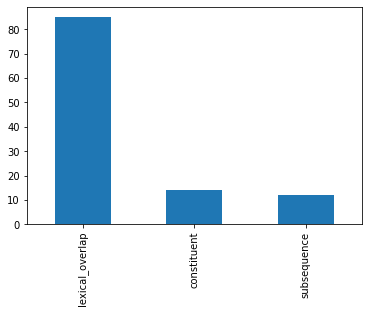

In [64]:
df_3['heuristic'].value_counts().plot(kind="bar")


In [66]:
df_4 = df[df['distilbert_prob']>0.50]

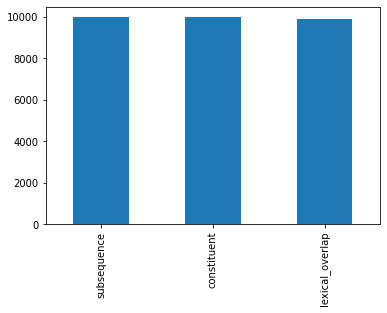

In [67]:
df_4['heuristic'].value_counts().plot(kind="bar")